In [1]:
import sys
import os
import cv2 as cv

import matplotlib.pyplot as plt

from skimage.feature import local_binary_pattern

In [2]:
sys.path.append(os.path.join(os.path.dirname(os.getcwd()),"modules"))

In [3]:
import NbrRegionSegment as seg


In [4]:
img = cv.imread("../Dataset/" + "P9_B12-27373-27674" + ".jpg")

In [5]:
# img = cv.resize(img, (0,0), fx = 0.5, fy = 0.5)

In [6]:
# img = cv.medianBlur(img, 3)

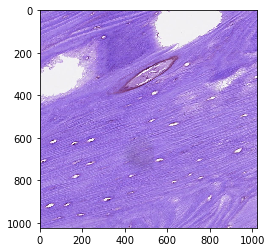

In [7]:
plt.imshow(img)

In [8]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [9]:
#LBP part
radius = 1
points = 8*radius 

lbp = local_binary_pattern(gray_img, points, radius, "uniform").astype("uint8")

print(lbp)

[[3 4 4 ... 3 4 3]
 [3 4 4 ... 5 5 3]
 [3 3 1 ... 9 1 0]
 ...
 [9 9 1 ... 4 4 4]
 [0 4 5 ... 9 7 5]
 [2 4 4 ... 4 1 0]]


In [38]:
# r1, r2 = seg.RegionExtract(img, lbp, 30, 5.12561905e-01, 1.17403947e-01, 8.39755087e-01, True)
r = seg.SegmentImage(img, lbp, 19, 0.39934324,  0.66032142,  0.16078696, 1, True)


Time to segment =  1.1309309005737305


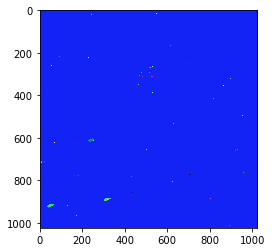

In [39]:
plt.imshow(r)

In [21]:
# r2.shape

In [22]:
# seg.GetAllSegVariance(gray_img, r1, r2.shape[0], True)

In [15]:
wr, wg = 0.57874522,  0.29999312

In [16]:
nimg = img * (wr, wg, 1-wr-wg)

In [33]:
nimg = nimg.astype("uint8")

In [34]:
arr = []
reg= []

for i in range(15, 50, 5):
    r1, r2 = seg.RegionExtract(img, lbp, i, 0.57874522,  0.29999312,   1,)

    a, b = seg.GetAllSegVariance(nimg, r1, r2.shape[0])
    reg.append(r2.shape[0])
    print(a, b, a+b)
    arr.append([a, b])

0.01840921863913536 1.059831142425537 1.0782403610646725
0.05277903378009796 0.8607035279273987 0.9134825617074966
0.14401745796203613 0.6126307845115662 0.7566482424736023
0.43146947026252747 0.5260634422302246 0.9575329124927521
1.349684715270996 0.48221805691719055 1.8319027721881866
4.516680717468262 0.5969423055648804 5.113623023033142
13.048548698425293 1.099982500076294 14.148531198501587


In [35]:
import numpy as np

In [36]:
np.Inf

inf

In [37]:
arr = np.array(arr)

In [38]:
reg = np.array(reg)

In [30]:
calc = (1024/reg)**1.8

In [31]:
calc

array([4.22302584e-03, 2.35432144e-02, 1.05564572e-01, 4.97028643e-01,
       2.69777857e+00, 1.66016286e+01, 1.31832922e+02, 2.00251444e+03])

In [32]:
arr[:, 0] + arr[:, 1]

array([ 1.14605306,  1.02201173,  0.92163828,  0.96775615,  1.41830599,
        2.82210007,  7.97706437, 34.06610745])

In [50]:
f = 10000/reg
arr[:, 0]*f + arr[:, 1]

array([1.09037066e+00, 1.10236577e+00, 2.38624480e+00, 1.63889116e+01,
       1.55618392e+02, 1.73778183e+03, 1.44994874e+04])

In [34]:
arr[:, 1]

array([1.12403893, 0.96182454, 0.78184855, 0.63603586, 0.56837702,
       0.48912278, 0.60002398, 0.62084454])

In [35]:
np.log(reg)

array([9.96880702, 9.01420383, 8.18060095, 7.31986493, 6.38012254,
       5.37063803, 4.21950771, 2.7080502 ])

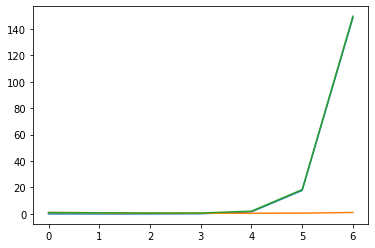

In [42]:
f = 102.4/reg
f2 = 1
plt.plot(arr[:, 0]*f)
plt.plot(arr[:, 1]*f2)
plt.plot(arr[:, 1]*f2 + arr[:, 0]*f)

True